In [1]:
#Importing Packages
from matplotlib import pyplot as plt
import numpy as np
from scipy.integrate import odeint
import sympy as sy
from scipy import optimize as opt

In [34]:
P, P_b, P_u, P_e, E, E_b, E_u, S, A_e, A_p, a, b, c, e_i, e_o, f, g, j, K_m, K_d, k, S_e, y, W, v_m, V, z = sy.symbols("P, P_b, P_u, P_e, E, E_b, E_u, S, A_e, A_p, a, b, c, e_i, e_o, f, g, j, K_m, K_d, k, S_e, y, W, v_m, V, z")

# Steady State Functions Creator Function
def Steady_State_Functions():
    dPdt = y - (k*S_e + (k/W)*S)*P + j*P_b + f*(A_e/A_p)*E - e_i*P + e_o*P_e
    dP_bdt = (k*S_e + (k/W)*S)*P - j*P_b - a*P_b
    dP_udt = a*P_b - g*(A_p/A_e)*P_u
    dP_edt = e_i*P - e_o*P_e
    dEdt = b*E_u + j*E_b - (k/W)*S*E - f*(A_e/A_p)*E
    dE_bdt = (k/W)*S*E - j*E_b - a*E_b
    dE_udt = a*E_b - b*E_u - z*E_u + g*(A_p/A_e)*P_u
    dSdt = -(k/W)*S*((A_p/V)*P+(A_e/V)*E) + (j+a)*((A_p/V)*P_b+(A_e/V)*E_b) - (v_m*S)/(V*(K_m+S))

    sol = sy.solvers.solve([dPdt, dP_bdt, dP_udt, dP_edt, dEdt, dE_bdt, dE_udt],[P, P_b, P_u, P_e, E, E_b, E_u])
    # sol = sy.solvers.solve([dPdt, dP_bdt, dP_udt, dP_edt, dEdt, dE_bdt, dE_udt, dSdt], [P, P_b, P_u, P_e, E, E_b, E_u, S])
    
    return sol

sol = Steady_State_Functions()
# print(sol)

print("Solution with every parameter")
print('    P   = lambda S, A_e, A_p, a, b, c, e_i, e_o, f, g, j, K_m, K_d, k, S_e, y, W, v_m, V, z:', sol[0][0])
print('    P_b = lambda S, A_e, A_p, a, b, c, e_i, e_o, f, g, j, K_m, K_d, k, S_e, y, W, v_m, V, z:', sol[0][1])
print('    P_u = lambda S, A_e, A_p, a, b, c, e_i, e_o, f, g, j, K_m, K_d, k, S_e, y, W, v_m, V, z:', sol[0][2])
print('    P_e = lambda S, A_e, A_p, a, b, c, e_i, e_o, f, g, j, K_m, K_d, k, S_e, y, W, v_m, V, z:', sol[0][3])
print('    E   = lambda S, A_e, A_p, a, b, c, e_i, e_o, f, g, j, K_m, K_d, k, S_e, y, W, v_m, V, z:', sol[0][4])
print('    E_b = lambda S, A_e, A_p, a, b, c, e_i, e_o, f, g, j, K_m, K_d, k, S_e, y, W, v_m, V, z:', sol[0][5])
print('    E_u = lambda S, A_e, A_p, a, b, c, e_i, e_o, f, g, j, K_m, K_d, k, S_e, y, W, v_m, V, z:', sol[0][6])
print()
print("Solution with only S as a parameter")
print('    P   = lambda S:', sol[0][0])
print('    P_b = lambda S:', sol[0][1])
print('    P_u = lambda S:', sol[0][2])
print('    P_e = lambda S:', sol[0][3])
print('    E   = lambda S:', sol[0][4])
print('    E_b = lambda S:', sol[0][5])
print('    E_u = lambda S:', sol[0][6])


Solution with every parameter
    P   = lambda S, A_e, A_p, a, b, c, e_i, e_o, f, g, j, K_m, K_d, k, S_e, y, W, v_m, V, z: W*y*(a + j)*(A_e*W*a*b*f + A_e*W*a*f*z + A_e*W*b*f*j + A_e*W*f*j*z + A_p*S*a*k*z)/(a*k*z*(S + S_e*W)*(A_e*W*a*f + A_e*W*f*j + A_p*S*a*k))
    P_b = lambda S, A_e, A_p, a, b, c, e_i, e_o, f, g, j, K_m, K_d, k, S_e, y, W, v_m, V, z: y*(A_e*W*a*b*f + A_e*W*a*f*z + A_e*W*b*f*j + A_e*W*f*j*z + A_p*S*a*k*z)/(a*z*(A_e*W*a*f + A_e*W*f*j + A_p*S*a*k))
    P_u = lambda S, A_e, A_p, a, b, c, e_i, e_o, f, g, j, K_m, K_d, k, S_e, y, W, v_m, V, z: A_e*y*(A_e*W*a*b*f + A_e*W*a*f*z + A_e*W*b*f*j + A_e*W*f*j*z + A_p*S*a*k*z)/(A_p*g*z*(A_e*W*a*f + A_e*W*f*j + A_p*S*a*k))
    P_e = lambda S, A_e, A_p, a, b, c, e_i, e_o, f, g, j, K_m, K_d, k, S_e, y, W, v_m, V, z: W*c*e_i*y*(a + j)*(A_e*W*a*b*f + A_e*W*a*f*z + A_e*W*b*f*j + A_e*W*f*j*z + A_p*S*a*k*z)/(A_e*S*W*a**2*c*e_o*f*k*z + A_e*S*W*a*c*e_o*f*j*k*z + A_e*S_e*W**2*a**2*c*e_o*f*k*z + A_e*S_e*W**2*a*c*e_o*f*j*k*z + A_e*W**2*a**2*b*e_i

In [35]:
# Steady States Solution Function
def Steady_States(A_e, A_p, a, b, c, e_i, e_o, f, g, j, K_m, K_d, k, S_e, y, W, v_m, V, z):
    """Computes the steady states given parameters
    
    Parameters:
        The values of the parameters in our model
    
    Returns:
        steadies (tuple): The steady states of each state
    """
    # Defining the steady state functions in terms of S
    P   = lambda S: W*y*(a + j)*(A_e*W*a*b*f + A_e*W*a*f*z + A_e*W*b*f*j + A_e*W*f*j*z + A_p*S*a*k*z)/(a*k*z*(S + S_e*W)*(A_e*W*a*f + A_e*W*f*j + A_p*S*a*k))
    P_b = lambda S: y*(A_e*W*a*b*f + A_e*W*a*f*z + A_e*W*b*f*j + A_e*W*f*j*z + A_p*S*a*k*z)/(a*z*(A_e*W*a*f + A_e*W*f*j + A_p*S*a*k))
    P_u = lambda S: A_e*y*(A_e*W*a*b*f + A_e*W*a*f*z + A_e*W*b*f*j + A_e*W*f*j*z + A_p*S*a*k*z)/(A_p*g*z*(A_e*W*a*f + A_e*W*f*j + A_p*S*a*k))
    P_e = lambda S: W*c*e_i*y*(a + j)*(A_e*W*a*b*f + A_e*W*a*f*z + A_e*W*b*f*j + A_e*W*f*j*z + A_p*S*a*k*z)/(A_e*S*W*a**2*c*e_o*f*k*z + A_e*S*W*a*c*e_o*f*j*k*z + A_e*S_e*W**2*a**2*c*e_o*f*k*z + A_e*S_e*W**2*a*c*e_o*f*j*k*z + A_e*W**2*a**2*b*e_i*f*y + A_e*W**2*a**2*e_i*f*y*z + 2*A_e*W**2*a*b*e_i*f*j*y + 2*A_e*W**2*a*e_i*f*j*y*z + A_e*W**2*b*e_i*f*j**2*y + A_e*W**2*e_i*f*j**2*y*z + A_p*S**2*a**2*c*e_o*k**2*z + A_p*S*S_e*W*a**2*c*e_o*k**2*z + A_p*S*W*a**2*e_i*k*y*z + A_p*S*W*a*e_i*j*k*y*z)
    E   = lambda S: A_p*W*b*y*(a + j)/(z*(A_e*W*a*f + A_e*W*f*j + A_p*S*a*k))
    E_b = lambda S: A_p*S*b*k*y/(z*(A_e*W*a*f + A_e*W*f*j + A_p*S*a*k))
    E_u = lambda S: y/z
    
    # Define the dSdt function is terms of the other functions and S
    dSdt = lambda S: -(k/W)*S*((A_p/V)*P(S)+(A_e/V)*E(S)) + (j+a)*((A_p/V)*P_b(S)+(A_e/V)*E_b(S)) - (v_m*S)/(V*(K_m+S))
    # Find the steady state of S using bisection method (the S that makes dSdt=0)
    S_steady = opt.bisect(dSdt, 0.01, 1)
    S = np.linspace(0.01,1,100)
    dSdt_sample = dSdt(S)
    zero = np.zeros_like(S)
    plt.plot(S, dSdt_sample)
    plt.plot(S, zero)
    plt.show()
    
    # Calculate the steady states of the other states
    P_steady = P(S_steady)
    P_b_steady = P_b(S_steady)
    P_u_steady = P_u(S_steady)
    P_e_steady = P_e(S_steady)
    E_steady = E(S_steady)
    E_b_steady = E_b(S_steady)
    E_u_steady = E_u(S_steady)

    # Return the steady states
    return P_steady, P_b_steady, P_u_steady, P_e_steady, E_steady, E_b_steady, E_u_steady, S_steady

In [36]:
# ODE Definition Function
def ODE(FM, t, A_e, A_p, a, b, c, e_i, e_o, f, g, j, K_m, K_d, k, S_e, y, W, v_m, V, z):
    P,P_b,P_u,P_e,E,E_b,E_u,S = FM
    dPdt = y - (k*S_e + (k/W)*S)*P + j*P_b + f*(A_e/A_p)*E - e_i*P*(1-P_e/c) + e_o*P_e
    dP_bdt = (k*S_e + (k/W)*S)*P - j*P_b - a*P_b
    dP_udt = a*P_b - g*(A_p/A_e)*P_u
    dP_edt = e_i*P*(1-P_e/c) - e_o*P_e
    dEdt = b*E_u + j*E_b - (k/W)*S*E - f*(A_e/A_p)*E
    dE_bdt = (k/W)*S*E - j*E_b - a*E_b
    dE_udt = a*E_b - b*E_u - z*E_u + g*(A_p/A_e)*P_u
    dSdt = -(k/W)*S*((A_p/V)*P+(A_e/V)*E) + (j+a)*((A_p/V)*P_b+(A_e/V)*E_b) - (v_m*S)/(V*(K_m+S))
    dydt = [dPdt, dP_bdt, dP_udt, dP_edt, dEdt, dE_bdt, dE_udt, dSdt]
    return dydt

In [37]:
# ODE Solver
def Solve_ODE(ODE, y0, T, num, A_e, A_p, a, b, c, e_i, e_o, f, g, j, K_m, K_d, k, S_e, y, W, v_m, V, z):
    t_span = np.linspace(0, T, num)
    sol = odeint(ODE, y0, t_span, args = (A_e, A_p, a, b, c, e_i, e_o, f, g, j, K_m, K_d, k, S_e, y, W, v_m, V, z))
    return t_span, sol

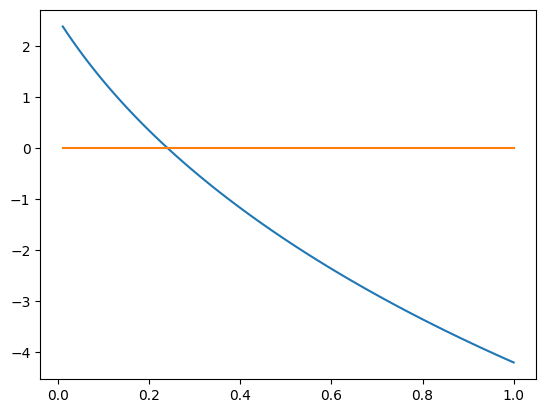

(0.060575906004249606,
 0.024922789201183425,
 0.03730481186164398,
 0.04315016885385771,
 1.6595093211003393,
 0.016660210798816577,
 0.041499999999999995,
 0.2401064727789162)

In [38]:
# Define Parameters
A_e = 47
A_p = 314
a = 1
b = 1
c = .15
e_i = .3
e_o = .3
f = .1
g = .1
j = 10**2
K_m = 2.5
K_d = .74
k = j/K_d
y = .000083
W = 32
v_m = 8.8 * 10**3
V = 523
z = .002

S_e = .3

Steady_States(A_e, A_p, a, b, c, e_i, e_o, f, g, j, K_m, K_d, k, S_e, y, W, v_m, V, z)

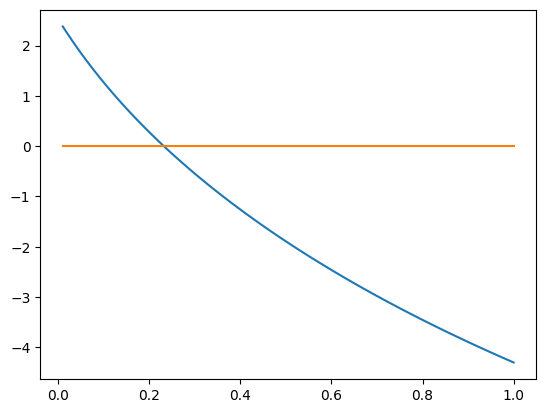

0.04150000000002754


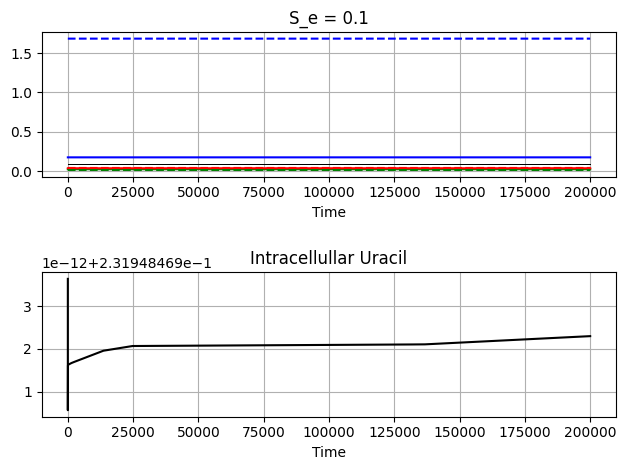

0.04150000000002754


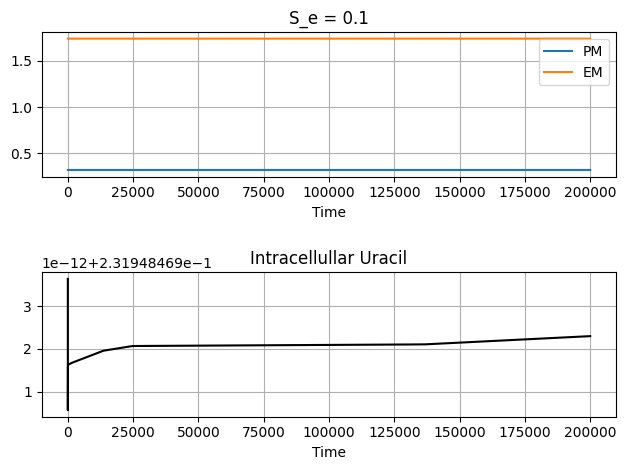

In [40]:
#Define Initial Condition, Timespan, and rates to test



S_e = 0.1
y0 = list(Steady_States(A_e, A_p, a, b, c, e_i, e_o, f, g, j, K_m, K_d, k, S_e, y, W, v_m, V, z))

T = int(2e5)
num = 10*T
t = np.linspace(0, T, num)


#Defining subplot
plt1 = plt.subplot(int(f"211"))
#Finding solution to ODE
t, sol = Solve_ODE(ODE, y0, T, num, A_e, A_p, a, b, c, e_i, e_o, f, g, j, K_m, K_d, k, S_e, y, W, v_m, V, z)
# print(sol)
#Plotting solution
plt1.plot(t,sol[:,0],'b',label = "PM Ground State")
plt1.plot(t,sol[:,1],'g',label = "PM Bound")
plt1.plot(t,sol[:,2],'r',label = "PM Ubiquitinated")
plt1.plot(t,sol[:,3],'k,',label = "Eisosome")
plt1.plot(t,sol[:,4],'b--',label = "EM Ground State")
plt1.plot(t,sol[:,5],'g--',label = "EM Bound")
plt1.plot(t,sol[:,6],'r--',label = "EM Ubiquitinated")
plt1.set_xlabel("Time")
# plt.legend()
plt.grid()
plt1.set_title(f"S_e = {S_e}")
plt2 = plt.subplot(int(f"212"))
plt2.plot(t,sol[:,7],'k',label = "Intracellullar Uracil")
plt2.set_xlabel("Time")
plt2.set_title("Intracellullar Uracil")
#Setting graph layout
# plt.legend()
plt.grid()
plt1.set_xlabel("Time")
print(sol[:,6][-1])


plt.tight_layout()
plt.show()


#Defining subplot
plt1 = plt.subplot(int(f"211"))
# print(sol)

PM = sol[:,0] + sol[:,1] + sol[:,2] + sol[:,3]
EM = sol[:,4] + sol[:,5] + sol[:,6]
#Plotting solution
plt1.plot(t,PM,label = "PM")
plt1.plot(t,EM,label = "EM")
plt1.set_xlabel("Time")
plt.legend()
# plt.legend()
plt.grid()
plt1.set_title(f"S_e = {S_e}")
plt2 = plt.subplot(int(f"212"))
plt2.plot(t,sol[:,7],'k',label = "Intracellullar Uracil")
plt2.set_xlabel("Time")
plt2.set_title("Intracellullar Uracil")
#Setting graph layout
# plt.legend()
plt.grid()
plt1.set_xlabel("Time")
print(sol[:,6][-1])


plt.tight_layout()
plt.show()